<a href="https://colab.research.google.com/github/MariaMaj59/neirons-learn/blob/main/2_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключение бд с гугл диска
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount = True)
df = pd.read_csv('drive/My Drive/Colab Notebooks/Neirons/2/sonar.csv', header = None)

Mounted at /content/drive


In [ ]:
# Входные данные

dataset = df.values               # Записываем только значения, без индексов

X = dataset[:,:-1].astype(float)  # Все данные кроме последнего столбца
Y = dataset[:,-1]                 # Последний столбец
Y[Y=='R'] = 0                     # Все значения R меняем на 0
Y[Y=='M'] = 1                     # Все значения М меняем на 1
Y = Y.astype(int)
print(Y.shape) # размерность данных

(208,)


In [ ]:
# ТРЕНИРОВОЧНАЯ И ТЕСТОВАЯ ВЫБОРКИ
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)
# X             Входные данные
# Y             Выходные данные
# test_size     Соотношение тренировочной и тестовой
# shuffle       Перемешивать ли данные

In [ ]:
# МОДЕЛЬ
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(60, use_bias = 60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# КОМПИЛЯЦИЯ

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics =['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# ОБУЧЕНИЕ

model.fit(x_train, y_train, batch_size = 9, epochs = 100, verbose = 1)

In [ ]:
# ПРОВЕРОЧНАЯ ВЫБОРКА

# ПАРАМЕТРОМ
model.fit(x_train, y_train, batch_size = 9, epochs = 100, validation_split = 0.2, verbose = 0)
#   validation_split = 0.2       Параметр автоматически создает проверочную выборку
#                               - При повторном запуске обучения выборки перемешиваются

# ВРУЧНУЮ
n = 30
model.fit(x_train[:-n], y_train[:-n], batch_size = 9, epachs = 100, validation_data = (x_train[-n:], y_train[-n:]), verbose = 0)
#   иногда подходит только этот вариант
#   при выделении для временных рядов

# МЕТОД
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)
# X             Входные данные
# Y             Выходные данные
# test_size     Соотношение тренировочной и тестовой
# shuffle       Перемешивать ли данные

In [ ]:
# ПРОВЕРКА НА ТЕСТОВОЙ

model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 1s 7ms/step - loss: 0.6872 - accuracy: 0.7619


[0.6871929168701172, 0.761904776096344]

In [ ]:
# ВИЩУАЛИЗАЦИЯ
import matplotlib.pyplot as plt

history = model.fit(x_test, y_test, batch_size = 9, epochs = 100, validation_data = (x_test, y_test), verbose = 0)
# print(history.history.keys())

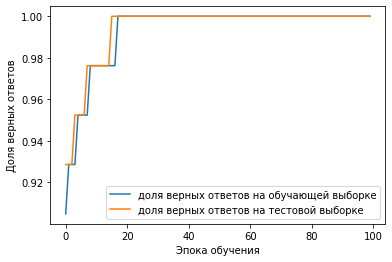

In [ ]:
# ГРАФИК ТОЧНОСТИ ОБУЧЕНИЯ
plt.plot(history.history['accuracy'], label = 'доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label = 'доля верных ответов на тестовой выборке')

plt.xlabel('Эпока обучения')
plt.ylabel('Доля верных ответов')

plt.legend()

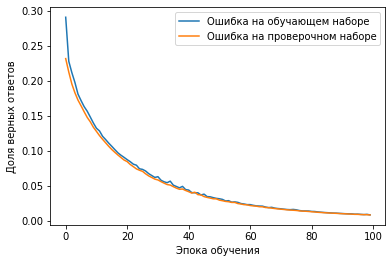

In [ ]:
# ГРАФИК ОШИБКИ

plt.plot(history.history['loss'], label = 'Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')

plt.xlabel('Эпока обучения')
plt.ylabel('Доля верных ответов')

plt.legend()

In [ ]:
# ПЕРЕОБУЧЕНИЕ

# Нейронная сеть заучивает верные ответы 
# Как бороться?
#             Увеличивать датасет
#             Проверять датасет на корректность чистить 
#             Упрощать архитектуру
#             Упрощать параметаризацию
#             Нормализовать данные
#             Использовать Dropout
#             Использовать BatchNormalization

In [ ]:
# DROPOUT
from keras.layers import Dropout

# Случайно отключает часть нейронов слоя во время обучения
# model.add(Dropout(0.4)) - 40%

# Пример
model.Sequential()
model.add(Dropout(0.3, input_shape=(60,)))
model.add(Dense(60, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activstion = 'sigmoid'))

In [ ]:
# BATCHNORMALIZATION
from keras.layers import BatchNormalization

# Приводит данные к нормальному распределению (от 0 до 1)
model.add(BatchNormalization)
# Не всегда помогает, иногда может ухудшить результат
# Может помочь в случае градиентого взрыва - когда значения выше допустимых, сеть выводит loss и accurasy как nan

In [ ]:
# СЛОВАРИ